 Import Necessary Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, silhouette_samples, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Load Data

In [2]:
# Load datasets
train_df = pd.read_csv('train.csv', delimiter=';')
test_df = pd.read_csv('test.csv', delimiter=';')

# Display dataset info and sample
print("Training Data Info:")
print(train_df.info())

print("\nSample Data:")
print(train_df.head())

print("\nClass Distribution in Training Data:")
print(train_df['label'].value_counts())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3340 non-null   object
 1   label   3340 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 52.3+ KB
None

Sample Data:
                                                text  label
0  trump tell million american hurricane victim r...      0
1  new york cable provider altice acc network new...      0
2  japan dentsu get small fine overtime breach de...      1
3  little kid toxic stress solve priscilla chan c...      1
4  fantasy football kicker ranking week warn some...      0

Class Distribution in Training Data:
label
0    1670
1    1670
Name: count, dtype: int64


Preprocessing

In [3]:
# Text preprocessing function
def preprocess_text_advanced(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    words = text.split()  # Tokenization
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    stemmer = PorterStemmer()  # Stemming
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
train_df['text_cleaned'] = train_df['text'].apply(preprocess_text_advanced)
test_df['text_cleaned'] = test_df['text'].apply(preprocess_text_advanced)

# Display sample cleaned data
print("\nSample Preprocessed Data:")
print(train_df[['text', 'text_cleaned']].head())


Sample Preprocessed Data:
                                                text  \
0  trump tell million american hurricane victim r...   
1  new york cable provider altice acc network new...   
2  japan dentsu get small fine overtime breach de...   
3  little kid toxic stress solve priscilla chan c...   
4  fantasy football kicker ranking week warn some...   

                                        text_cleaned  
0  trump tell million american hurrican victim re...  
1  new york cabl provid altic acc network new yor...  
2  japan dentsu get small fine overtim breach des...  
3  littl kid toxic stress solv priscilla chan ceo...  
4  fantasi footbal kicker rank week warn someth b...  


TF-IDF Vectorization

In [4]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = tfidf.fit_transform(train_df['text_cleaned']).toarray()
X_test = tfidf.transform(test_df['text_cleaned']).toarray()

# Labels
y_train = train_df['label']
y_test = test_df['label']

print("TF-IDF Transformation Completed.")
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)

TF-IDF Transformation Completed.
X_train Shape: (3340, 5000)
X_test Shape: (798, 5000)


Feature Selection

In [5]:
from sklearn.feature_selection import chi2

# Compute Chi-Square scores
chi2_scores, p_values = chi2(X_train, y_train)

# Select top features
top_features = np.argsort(chi2_scores)[-20:]
feature_names = np.array(tfidf.get_feature_names_out())[top_features]

print("\nTop 20 Features Selected by Chi-Square:")
print(feature_names)


Top 20 Features Selected by Chi-Square:
['contentad' 'jet' 'cent' 'light' 'cent news' 'reader' 'think stori'
 'add two' 'two cent' 'stori fact' 'reader think' 'fact add' 'content'
 'reuter' 'sourc http' 'raven' 'weinstein' 'http' 'mr' 'say']


K-Nearest Neighbors (KNN)

In [6]:
# Train and test KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Cross-validation
evaluate_with_cross_validation(knn, X_train, y_train)


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       450
           1       0.88      0.94      0.91       348

    accuracy                           0.92       798
   macro avg       0.91      0.92      0.92       798
weighted avg       0.92      0.92      0.92       798



NameError: name 'evaluate_with_cross_validation' is not defined

Defining the evaluate_with_cross_validation Function

In [7]:
from sklearn.model_selection import cross_val_score

def evaluate_with_cross_validation(model, X, y, cv=5):
    """
    Evaluate a model using K-Fold Cross-Validation.

    Parameters:
    model: The machine learning model to evaluate
    X: Feature matrix
    y: Target vector
    cv: Number of folds (default is 5)

    Returns:
    None: Prints the cross-validation scores and their mean.
    """
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")

Again Implementing K-Nearest Neighbors (KNN)

In [8]:
# Train and test KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Cross-validation
evaluate_with_cross_validation(knn, X_train, y_train)


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       450
           1       0.88      0.94      0.91       348

    accuracy                           0.92       798
   macro avg       0.91      0.92      0.92       798
weighted avg       0.92      0.92      0.92       798

Cross-Validation Scores: [0.92215569 0.92065868 0.94610778 0.90868263 0.92365269]
Mean Accuracy: 0.9243


Naive Bayes

In [9]:
# Train and test Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Evaluate Naive Bayes
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       450
           1       0.83      0.98      0.90       348

    accuracy                           0.90       798
   macro avg       0.91      0.91      0.90       798
weighted avg       0.91      0.90      0.90       798



Support Vector Machine (SVM)

In [10]:
# Train and test SVM
svm = SVC(kernel='linear', C=1.0, probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       450
           1       0.98      0.98      0.98       348

    accuracy                           0.98       798
   macro avg       0.98      0.98      0.98       798
weighted avg       0.98      0.98      0.98       798



Hyperparameter Tuning

a. KNN Hyperparameter Tuning

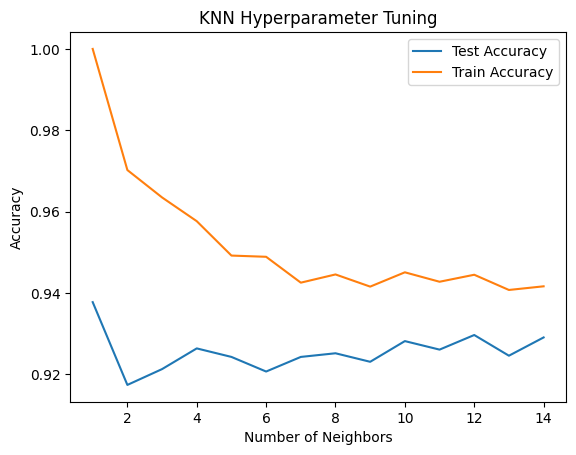


Best Parameters for KNN: {'n_neighbors': 1}


In [11]:
# Hyperparameter tuning for KNN
param_grid_knn = {'n_neighbors': range(1, 15)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', return_train_score=True)
grid_knn.fit(X_train, y_train)

# Visualization
results_knn = pd.DataFrame(grid_knn.cv_results_)
plt.plot(results_knn['param_n_neighbors'], results_knn['mean_test_score'], label='Test Accuracy')
plt.plot(results_knn['param_n_neighbors'], results_knn['mean_train_score'], label='Train Accuracy')
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.legend()
plt.show()

print("\nBest Parameters for KNN:", grid_knn.best_params_)

b. SVM Hyperparameter Tuning

In [12]:
# Hyperparameter tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("\nBest Parameters for SVM:", grid_svm.best_params_)


Best Parameters for SVM: {'C': 10, 'kernel': 'linear'}


Clustering (K-Means)


Silhouette Score: 0.0311


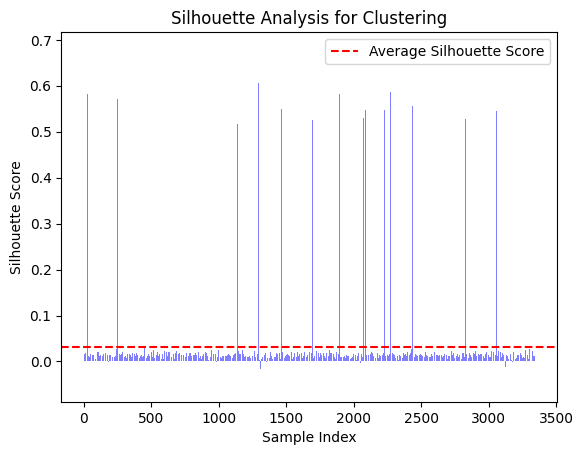

In [13]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train)

# Evaluate clustering
sil_score = silhouette_score(X_train, clusters)
print(f"\nSilhouette Score: {sil_score:.4f}")

# Silhouette visualization
sample_silhouette_values = silhouette_samples(X_train, clusters)
plt.bar(range(len(sample_silhouette_values)), sample_silhouette_values, color='blue', alpha=0.5)
plt.axhline(y=sil_score, color='red', linestyle='--', label='Average Silhouette Score')
plt.title("Silhouette Analysis for Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

Model Comparison and Visualizations

a. Accuracy Comparison

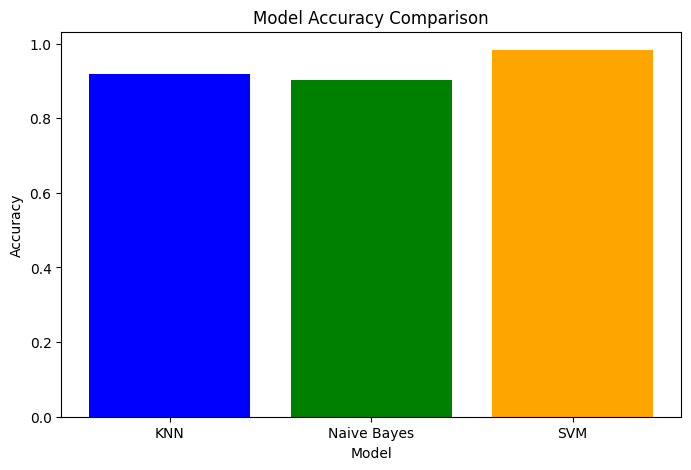

In [14]:
accuracy_scores = {
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'orange'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

b. ROC Curve for SVM

In [16]:
from sklearn.preprocessing import LabelBinarizer

Again Executing

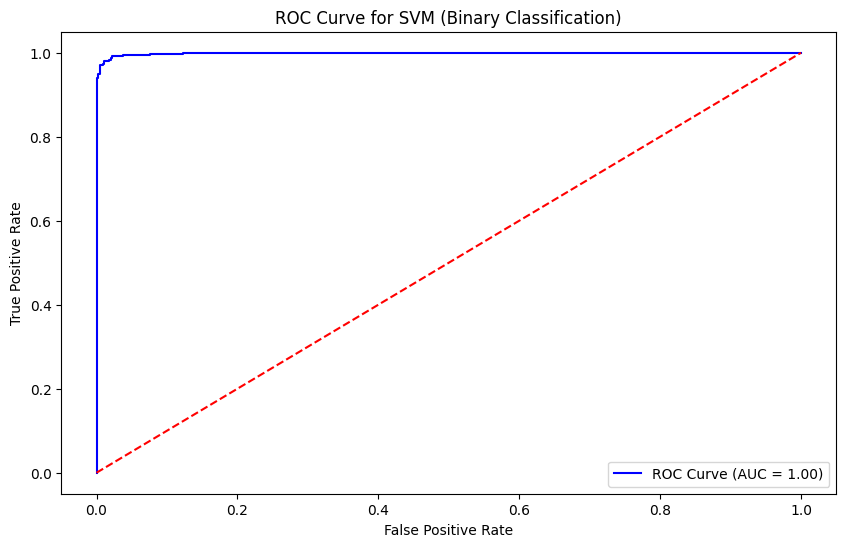

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Binarize labels for binary classification
y_test_binarized = LabelBinarizer().fit_transform(y_test)

# Calculate decision function scores
y_score = svm.decision_function(X_test)

# Compute ROC curve and AUC score for the positive class
fpr, tpr, _ = roc_curve(y_test_binarized, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("ROC Curve for SVM (Binary Classification)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Final Metrics Table


Final Model Metrics:
         Model  Precision    Recall  F1-Score
0          KNN   0.914868  0.919828  0.916495
1  Naive Bayes   0.905365  0.911839  0.903253
2          SVM   0.982165  0.982165  0.982165


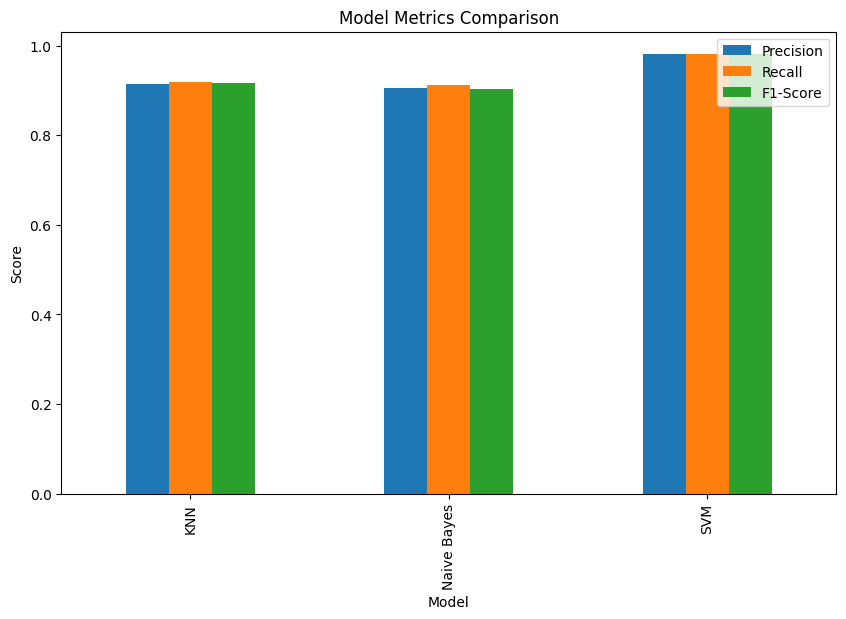

In [19]:
metrics = {
    "Model": ["KNN", "Naive Bayes", "SVM"],
    "Precision": [
        precision_score(y_test, y_pred_knn, average='macro'),
        precision_score(y_test, y_pred_nb, average='macro'),
        precision_score(y_test, y_pred_svm, average='macro'),
    ],
    "Recall": [
        recall_score(y_test, y_pred_knn, average='macro'),
        recall_score(y_test, y_pred_nb, average='macro'),
        recall_score(y_test, y_pred_svm, average='macro'),
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_knn, average='macro'),
        f1_score(y_test, y_pred_nb, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro'),
    ]
}

metrics_df = pd.DataFrame(metrics)
print("\nFinal Model Metrics:")
print(metrics_df)

# Visualize Metrics
metrics_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Model Metrics Comparison")
plt.ylabel("Score")
plt.show()